The Correlation between poverty rates and per capita income/GDP in various countries

CODE1161
Shaojie Dai

My data project collects poverty rates, GDP per capita, and income per capita for countries from 1970 to 2020. It aims to analyze the correlation between them and explore how these economic indicators affect the prevalence of poverty.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [41]:
filepath = "API_SI.POV.DDAY_DS2_en_csv_v2_5728820.csv"
phr_data = pd.read_csv(filepath)
print("done")

filepath = "API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5728786.csv"
gpc_data = pd.read_csv(filepath)
print("done")

filepath = "API_NY.ADJ.NNTY.PC.CD_DS2_en_csv_v2_5730096.csv"
ipc_data = pd.read_csv(filepath)
print("done")

done
done
done


Poverty headcount ratio data

In [5]:
phr_data.head()

,Country_Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.5,NaN,0.5,NaN,0.5,NaN,NaN
1,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.3,4.5,3.7,3.3,3.9,4.7,5.3,5.3,5.4,1.9
2,Canada,NaN,2.2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0.2,0.2,0.5,0.2,0.2,0.2,0.2,0.2,NaN,NaN
3,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.2,8.5,2.9,2.1,1.2,0.8,0.7,0.4,0.1,NaN
4,France,0.0,NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN,...,0.0,0.1,0.1,0.0,0.1,0.1,0.0,0.0,0.1,0.1


GDP per capita data

In [6]:
gpc_data.head()

,Country_Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Australia,3304.837820,3495.141628,3949.461643,4770.714415,6482.831082,7003.842471,7486.684973,7775.577645,8252.652035,...,62598.686620,68047.378180,68156.386100,62515.314830,56708.961200,49876.712380,53934.154370,57206.990670,54941.065720,51722.069000
1,Brazil,439.220916,494.802750,577.451537,806.354513,1034.164430,1188.619532,1376.347928,1547.694206,1716.707728,...,13200.558170,12327.515560,12258.564850,12071.404650,8783.214413,8680.735421,9896.717511,9121.020092,8845.323931,6923.700197
2,Canada,4135.821498,4535.346032,5106.737080,5858.391831,7056.582022,7536.821932,8838.693384,8949.109893,9154.760931,...,52223.696110,52669.089960,52635.174960,50955.998320,43596.135540,42315.603710,45129.429300,46547.795180,46374.152750,43349.677860
3,China,113.162582,118.654149,131.885532,157.089148,160.147681,178.339577,165.404233,185.420499,156.396389,...,5614.385739,6300.582352,7020.385682,7636.074223,8016.446016,8094.390375,8817.045496,9905.406118,10143.860210,10408.719120
4,France,2870.157510,3180.337440,3865.925400,4984.196684,5345.896035,6717.439489,6899.069578,7566.662559,9299.747373,...,43846.466080,40870.852360,42602.717970,43068.548720,36652.922310,37062.533570,38781.049490,41557.854860,40494.898290,39055.282930


National income per capita data

In [7]:
ipc_data.head()

,Country_Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Australia,2679.49,2828.03,3247.87,3942.54,5330.87,5785.31,6190.98,6364.68,6724.80,...,48255.55,53382.55,53834.81,48664.39,44267.58,39055.24,42000.89,43990.14,42364.65,40200.58
1,Brazil,393.73,448.47,520.10,678.47,874.52,996.84,1200.04,1357.37,1498.49,...,11156.21,10454.61,10581.81,10371.61,7619.19,7530.48,8547.18,7737.67,7565.58,5783.81
2,Canada,3429.76,3774.18,4278.77,4861.05,5705.51,6139.20,7226.17,7253.14,7399.26,...,42619.40,43099.95,43061.31,41719.05,35274.02,34330.33,36956.08,37633.86,37802.58,35052.95
3,China,103.52,108.59,120.16,143.01,141.61,154.73,140.97,157.64,132.38,...,4163.08,4799.85,5273.57,5799.90,6039.92,6145.89,6714.79,7378.39,7545.86,7572.28
4,France,2527.57,2800.34,3379.56,4348.71,4623.94,5785.36,5920.64,6474.50,7947.71,...,37179.18,34366.27,35806.98,36132.10,30878.47,31132.53,32620.98,34876.75,33928.71,31681.88


In [39]:
phr_data.columns

Index(['name', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [42]:
phr_data.set_index("Country_Name",inplace=True)
gpc_data.set_index("Country_Name",inplace=True)
ipc_data.set_index("Country_Name",inplace=True)

<Axes: title={'center': 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'}, xlabel='Years'>

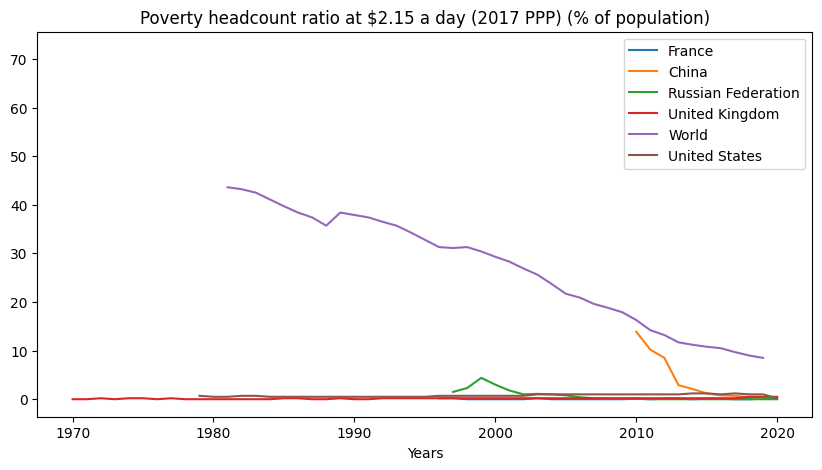

In [10]:
row_4 = phr_data.iloc[4]
row_4.plot(legend = True)
row_3 = phr_data.iloc[3]
row_3.plot(legend = True)
row_9 = phr_data.iloc[9]
row_9.plot(legend = True)
row_12 = phr_data.iloc[12]
row_12.plot(legend = True)
row_14 = phr_data.iloc[14]
row_14.plot(legend = True)
row_13 = phr_data.iloc[13]
row_13.plot(title="Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)", xlabel="Years", legend = True)

<Axes: title={'center': 'GDP per capita (current US$)'}, xlabel='Years'>

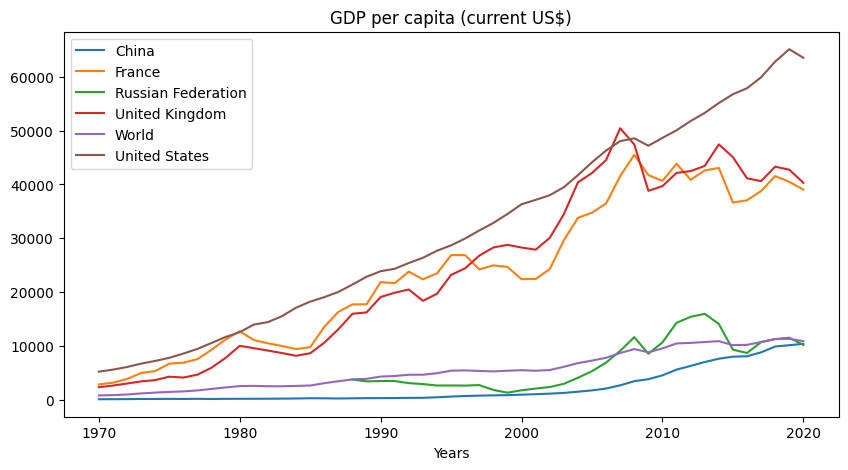

In [11]:
row_3 = gpc_data.iloc[3]
row_3.plot(legend = True)
row_4 = gpc_data.iloc[4]
row_4.plot(legend = True)
row_9 = gpc_data.iloc[9]
row_9.plot(legend = True)
row_12 = gpc_data.iloc[12]
row_12.plot(legend = True)
row_14 = gpc_data.iloc[14]
row_14.plot(legend = True)
row_13 = gpc_data.iloc[13]
row_13.plot(title="GDP per capita (current US$)", xlabel="Years", legend = True)

<Axes: title={'center': 'Adjusted net national income per capita (current US$)'}, xlabel='Years'>

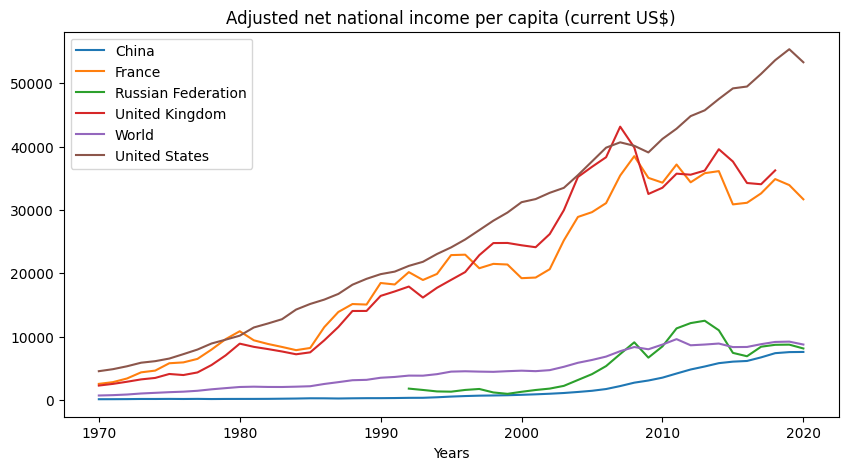

In [12]:
row_3 = ipc_data.iloc[3]
row_3.plot(legend = True)
row_4 = ipc_data.iloc[4]
row_4.plot(legend = True)
row_9 = ipc_data.iloc[9]
row_9.plot(legend = True)
row_12 = ipc_data.iloc[12]
row_12.plot(legend = True)
row_14 = ipc_data.iloc[14]
row_14.plot(legend = True)
row_13 = ipc_data.iloc[13]
row_13.plot(title="Adjusted net national income per capita (current US$)", xlabel="Years", legend = True)

<Axes: title={'center': 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'}, xlabel='Country_Name'>

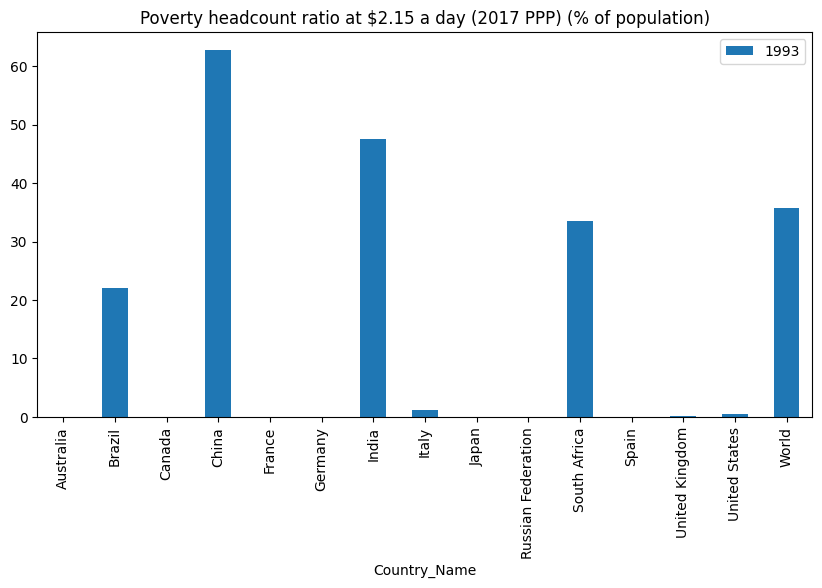

In [13]:
phr_data['1993'].plot(kind="bar", title="Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)", legend = True)

In [14]:
phr_data['1993']

Country_Name
Australia              NaN
Brazil                22.1
Canada                 NaN
China                 62.7
France                 NaN
Germany                0.0
India                 47.6
Italy                  1.2
Japan                  NaN
Russian Federation     NaN
South Africa          33.5
Spain                  NaN
United Kingdom         0.2
United States          0.5
World                 35.7
Name: 1993, dtype: float64

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.loc[world['name'].isin(['Taiwan'])]
world.replace('Taiwan', 'China', inplace = True)

world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")] 

C:\Users\Davy\AppData\Local\Temp\ipykernel_1924\2051945337.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [16]:
filepath = "API_SI.POV.DDAY_DS2_en_csv_v2_5728820.csv"
phr_data = pd.read_csv(filepath)

phr_data.drop(14,inplace=True)

In [17]:
world.replace('United States of America', 'United States', inplace=True)
world.replace('Russia', 'Russian Federation', inplace=True)

In [18]:
phr_data.rename(columns = {'Country_Name': 'name'},inplace=True )

In [19]:
combined_phr = world.merge(phr_data, on = 'name')

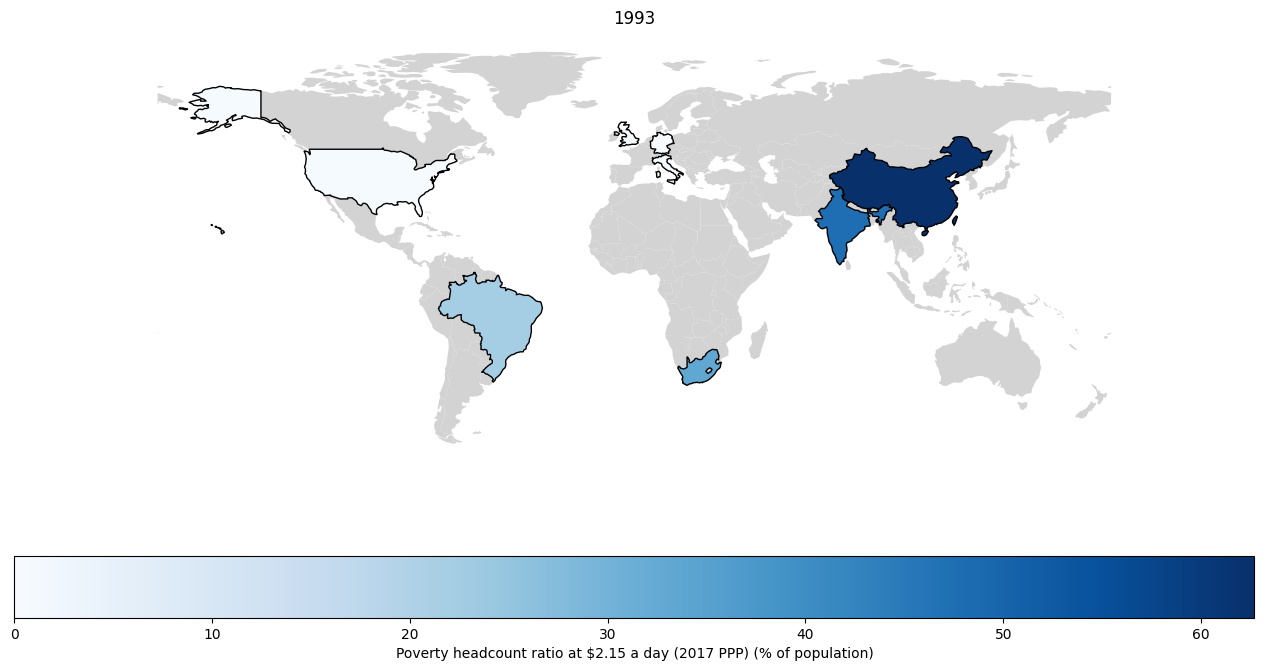

In [20]:
fig, ax = plt.subplots(1, figsize=(16,8))
world.plot(ax=ax, color='lightgrey')
years = '1993'
combined_phr.plot(column = years, ax=ax, cmap='Blues', edgecolors='black', legend=True,legend_kwds={'label': "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)",'orientation': "horizontal"})
ax.set_title(years)
ax.axis('off')
plt.show()

<Axes: title={'center': 'Adjusted net national income per capita (current US$)'}, xlabel='Country_Name'>

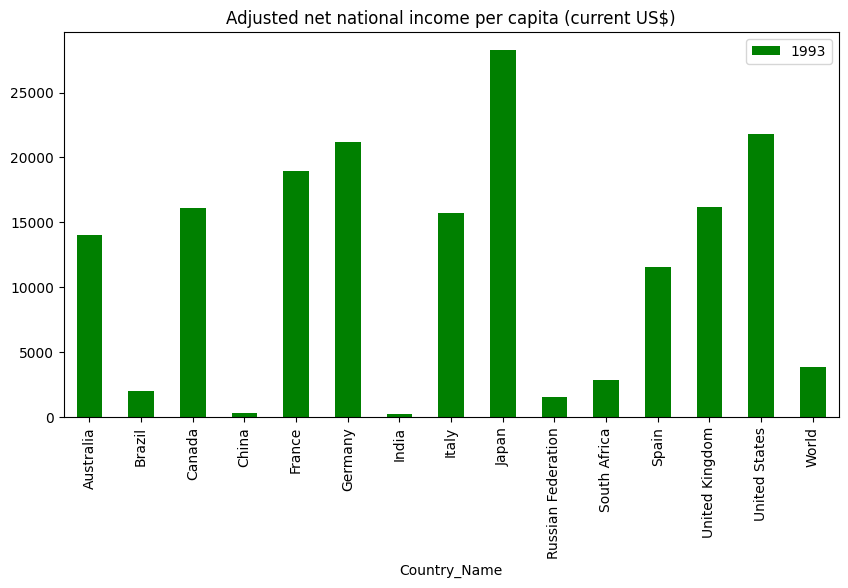

In [21]:
ipc_data['1993'].plot(kind="bar", title="Adjusted net national income per capita (current US$)", color = 'Green', legend = True)

In [22]:
ipc_data['1993']

Country_Name
Australia             14000.60
Brazil                 2012.46
Canada                16106.06
China                   328.21
France                18936.47
Germany               21217.57
India                   262.71
Italy                 15689.81
Japan                 28255.37
Russian Federation     1566.95
South Africa           2864.42
Spain                 11566.10
United Kingdom        16163.44
United States         21808.81
World                  3822.88
Name: 1993, dtype: float64

In [23]:
filepath = "API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5728786.csv"
gpc_data = pd.read_csv(filepath)

gpc_data.drop(14,inplace=True)

In [24]:
gpc_data.rename(columns = {'Country_Name': 'name'},inplace=True )

In [25]:
combined_gpc = world.merge(gpc_data, on = 'name')

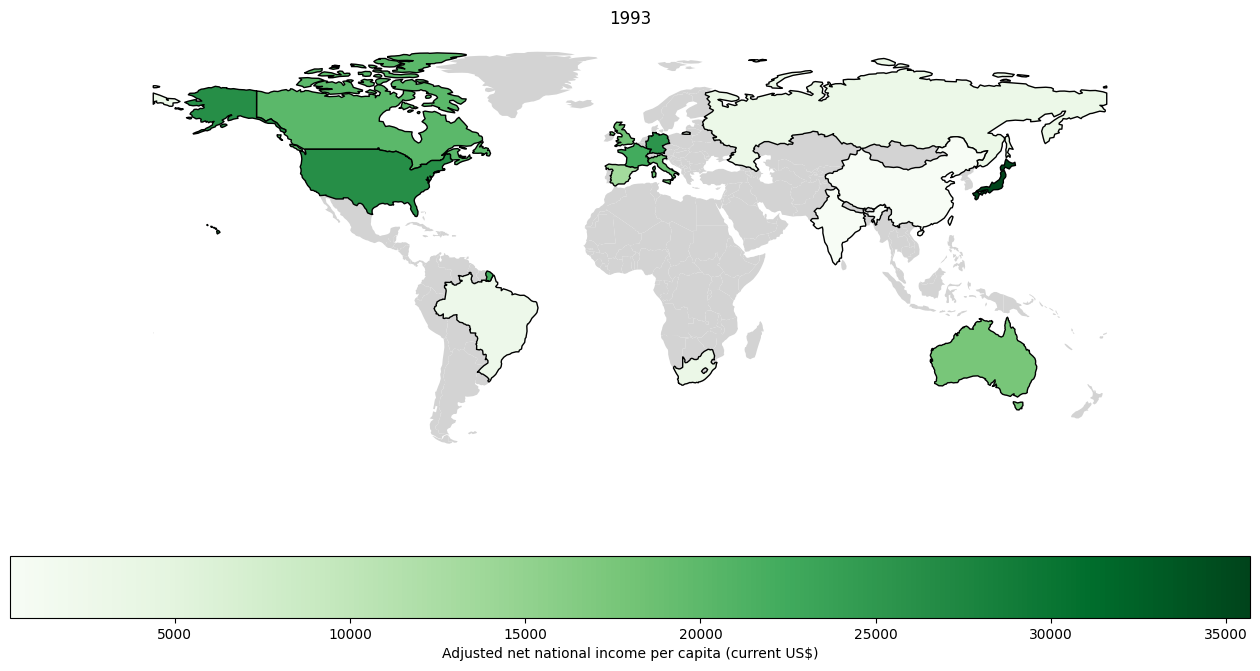

In [26]:
fig, ax = plt.subplots(1, figsize=(16,8))
world.plot(ax=ax, color='lightgrey')
years = '1993'
combined_gpc.plot(column = years, ax=ax, cmap='Greens', edgecolors='black', legend=True,legend_kwds={'label': "Adjusted net national income per capita (current US$)",'orientation': "horizontal"})
ax.set_title(years)
ax.axis('off')
plt.show()

<Axes: title={'center': 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'}>

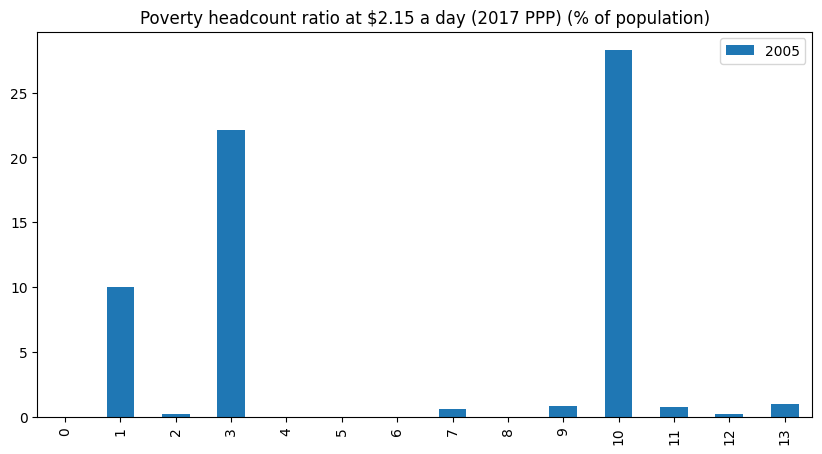

In [27]:
phr_data['2005'].plot(kind="bar", title="Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)", legend = True)

In [43]:
phr_data['2005']

Country_Name
Australia              NaN
Brazil                10.0
Canada                 0.2
China                 22.1
France                 0.0
Germany                0.0
India                  NaN
Italy                  0.6
Japan                  NaN
Russian Federation     0.8
South Africa          28.3
Spain                  0.7
United Kingdom         0.2
United States          1.0
World                 21.7
Name: 2005, dtype: float64

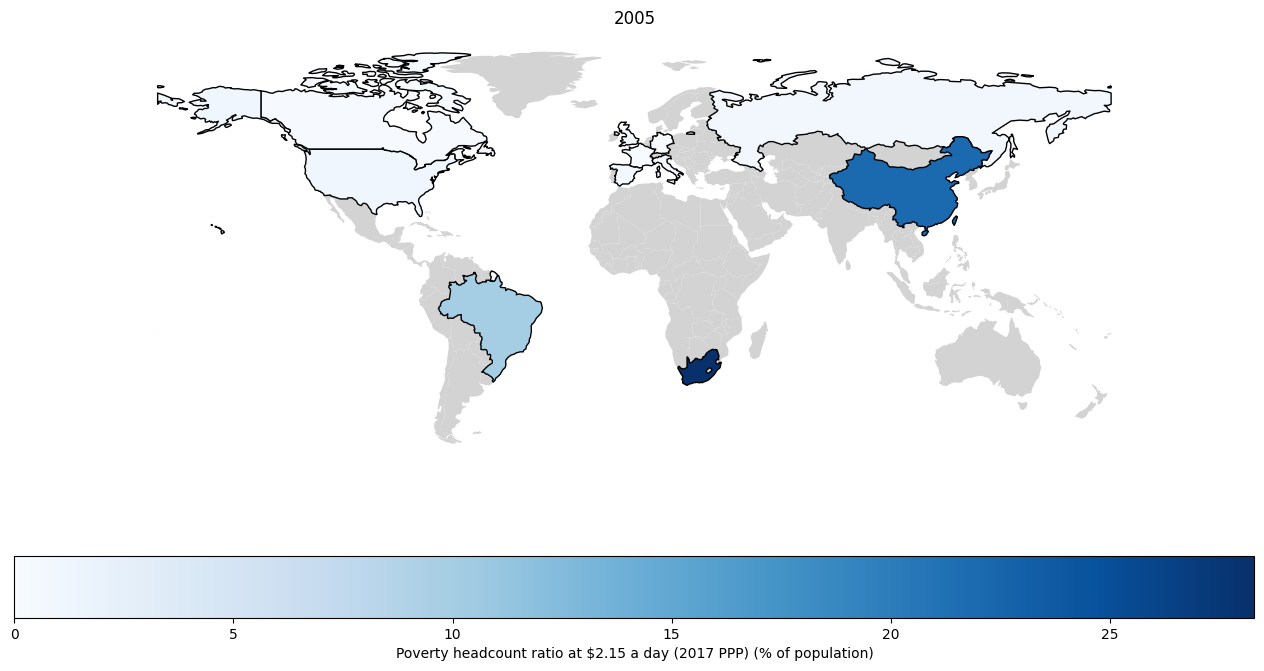

In [44]:
fig, ax = plt.subplots(1, figsize=(16,8))
world.plot(ax=ax, color='lightgrey')
years = '2005'
combined_phr.plot(column = years, ax=ax, cmap='Blues', edgecolors='black', legend=True,legend_kwds={'label': "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)",'orientation': "horizontal"})
ax.set_title(years)
ax.axis('off')
plt.show()

<Axes: title={'center': 'Adjusted net national income per capita (current US$)'}, xlabel='Country_Name'>

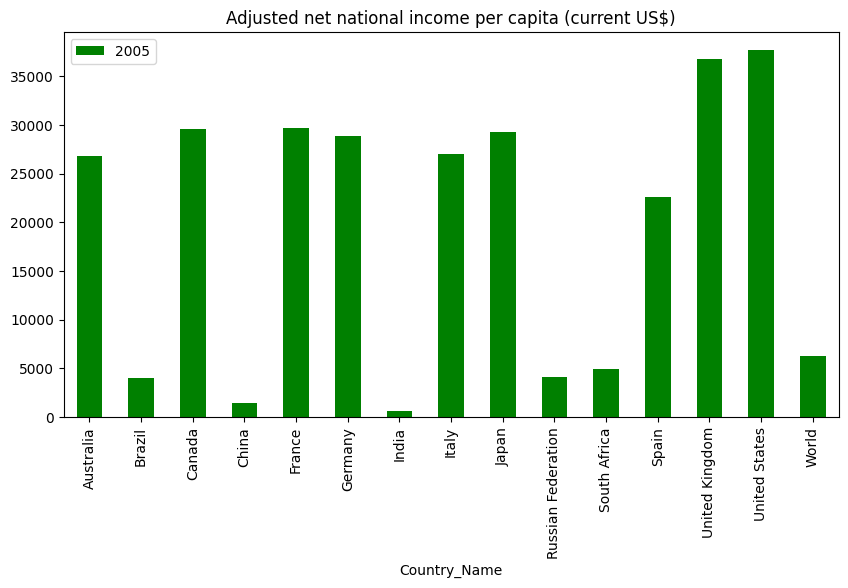

In [45]:
ipc_data['2005'].plot(kind="bar", title="Adjusted net national income per capita (current US$)", color = 'Green', legend = True)

In [35]:
ipc_data['2005']

Country_Name
Australia             26825.37
Brazil                 4027.92
Canada                29608.43
China                  1435.43
France                29652.70
Germany               28838.64
India                   617.46
Italy                 27036.52
Japan                 29304.50
Russian Federation     4066.82
South Africa           4972.38
Spain                 22572.03
United Kingdom        36814.72
United States         37665.68
World                  6305.49
Name: 2005, dtype: float64

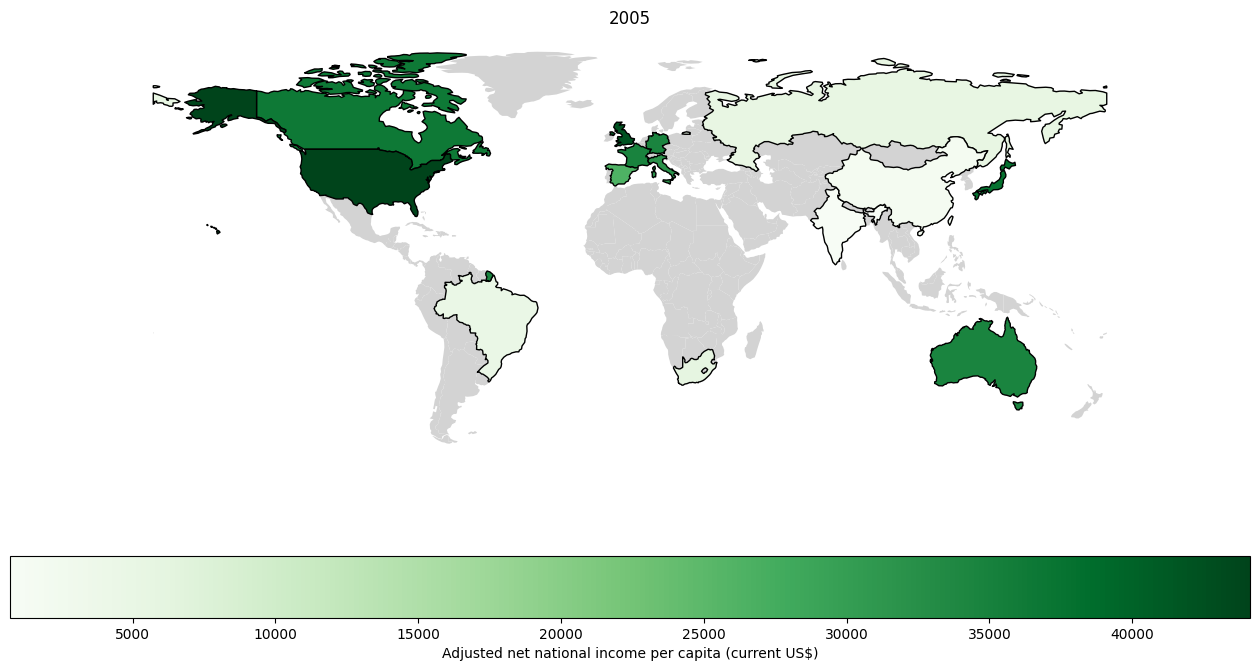

In [46]:
fig, ax = plt.subplots(1, figsize=(16,8))
world.plot(ax=ax, color='lightgrey')
years = '2005'
combined_gpc.plot(column = years, ax=ax, cmap='Greens', edgecolors='black', legend=True,legend_kwds={'label': "Adjusted net national income per capita (current US$)",'orientation': "horizontal"})
ax.set_title(years)
ax.axis('off')
plt.show()

<Axes: title={'center': 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'}, xlabel='Country_Name'>

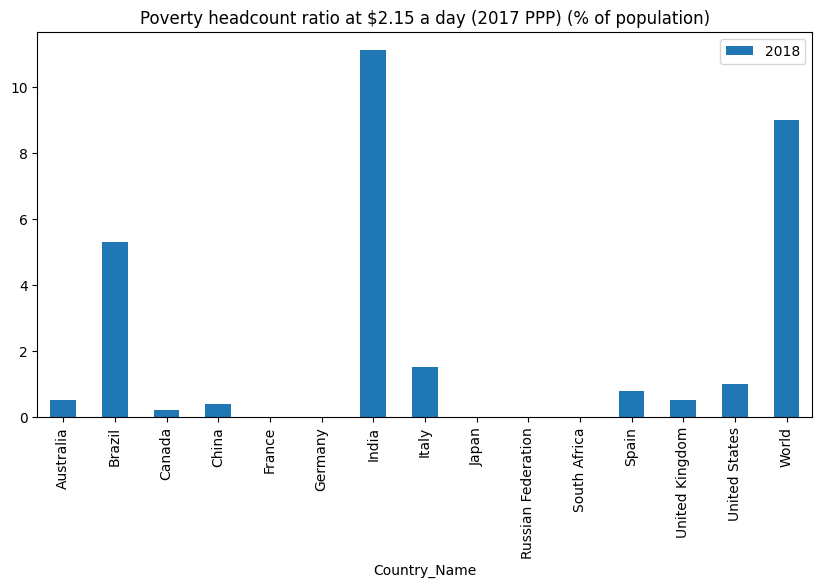

In [47]:
phr_data['2018'].plot(kind="bar", title="Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)", legend = True)

In [48]:
phr_data['2018']

Country_Name
Australia              0.5
Brazil                 5.3
Canada                 0.2
China                  0.4
France                 0.0
Germany                0.0
India                 11.1
Italy                  1.5
Japan                  NaN
Russian Federation     0.0
South Africa           NaN
Spain                  0.8
United Kingdom         0.5
United States          1.0
World                  9.0
Name: 2018, dtype: float64

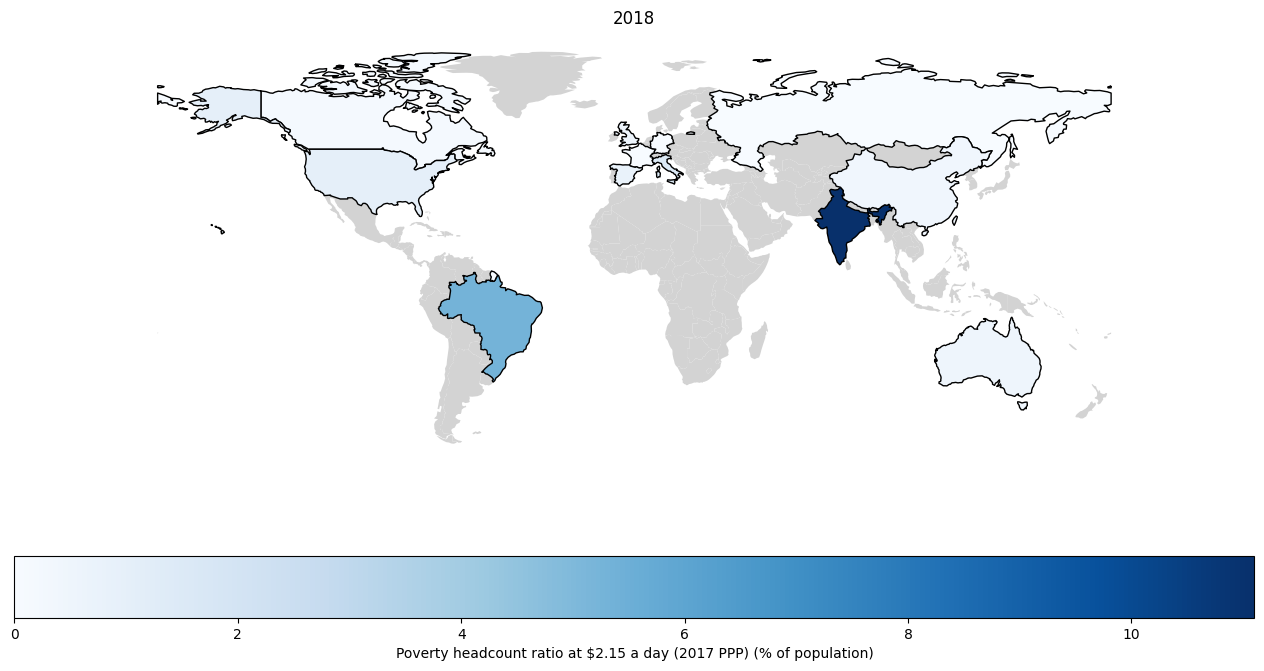

In [49]:
fig, ax = plt.subplots(1, figsize=(16,8))
world.plot(ax=ax, color='lightgrey')
years = '2018'
combined_phr.plot(column = years, ax=ax, cmap='Blues', edgecolors='black', legend=True,legend_kwds={'label': "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)",'orientation': "horizontal"})
ax.set_title(years)
ax.axis('off')
plt.show()

<Axes: title={'center': 'Adjusted net national income per capita (current US$)'}, xlabel='Country_Name'>

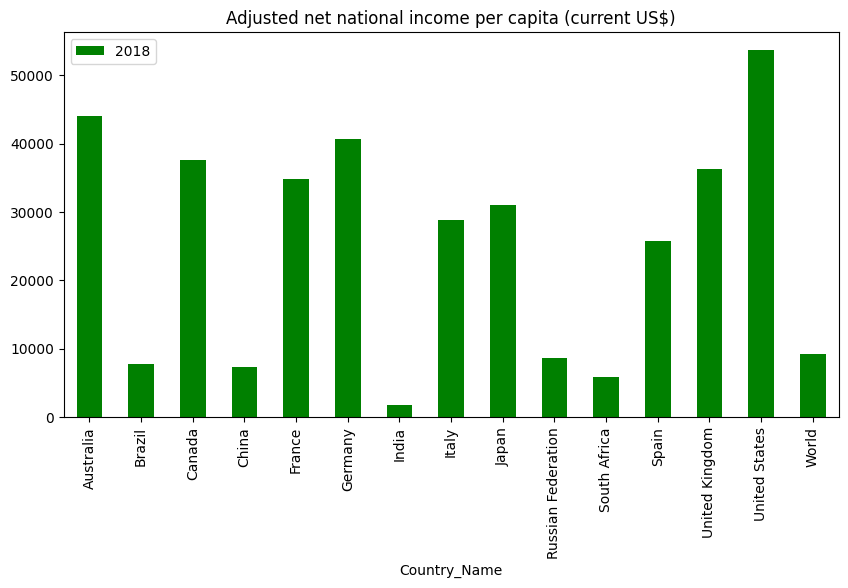

In [121]:
ipc_data['2018'].plot(kind="bar", title="Adjusted net national income per capita (current US$)", color = 'Green', legend = True)

In [50]:
ipc_data['2018']

Country_Name
Australia             43990.14
Brazil                 7737.67
Canada                37633.86
China                  7378.39
France                34876.75
Germany               40746.22
India                  1721.43
Italy                 28817.68
Japan                 31071.14
Russian Federation     8698.06
South Africa           5788.14
Spain                 25714.57
United Kingdom        36247.52
United States         53655.98
World                  9151.71
Name: 2018, dtype: float64

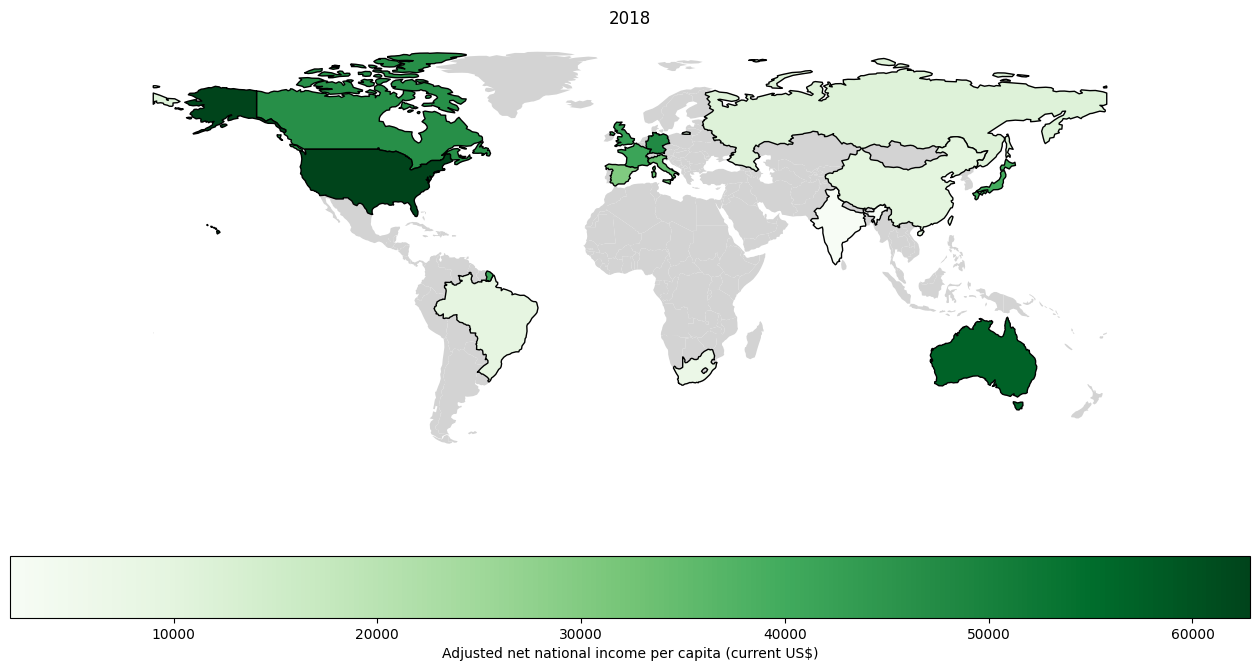

In [51]:
fig, ax = plt.subplots(1, figsize=(16,8))
world.plot(ax=ax, color='lightgrey')
years = '2018'
combined_gpc.plot(column = years, ax=ax, cmap='Greens', edgecolors='black', legend=True,legend_kwds={'label': "Adjusted net national income per capita (current US$)",'orientation': "horizontal"})
ax.set_title(years)
ax.axis('off')
plt.show()